In [1]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
%matplotlib inline
from datetime import timedelta
#### TODO: check selection time periods before averaging taht is consistent across models and vars

In [2]:
ddir= '/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/postprocessing/'
#read in different files
def open_ds(var,case,esm='cesm',model='cam',ens='001',stream='h0'):
    if esm=='cesm':
        if case[:4]=='hist':
            comp='BHIST'
            tseriesdir = ddir + 'b.e213.'+comp+'_BPRP.f09_g17.esm-hist-i308.'+ens+'/' 
        else:
            comp='BSSP126'
            tseriesdir = ddir + 'b.e213.'+comp+'_BPRP.f09_g17.esm-'+case+'-i308.'+ens+'/' 

        # define filename
        fn = var+'_b.e213.'+comp+'_BPRP.f09_g17.esm-'+case+'-i308.'+ ens + '.' + model + '.' + stream + '.nc'
    else:
        ens='i'+ens[-1]

        if case=='hist':
            case='histctl'
            tspan='1980-2014'
        else:
            tspan='2015-2099'
        tseriesdir = ddir + esm+'/'+case+'/'
        # define filename
        if stream=='h0':
            fn = var+'_monthly_'+esm+'_'+case+'_'+ens+'_no-dynveg_'+tspan+ '.nc'
        elif stream=='h2':
            fn = var+'_3hr_'+esm+'_'+case+'_'+ens+'_no-dynveg_'+tspan+ '.nc'
        elif stream=='h1':
            fn = var+'_'+esm+'_'+case+'_'+ens+'_no-dynveg_'+tspan+ '.nc'

    # check if variable timeseries exists and open variable as data array
    if not os.path.isfile(tseriesdir + fn):
        print(fn + ' does not exists in ')
        print(tseriesdir)
        return
    else: 
        
        if esm=='cesm':
            ds = xr.open_dataset(tseriesdir+fn)
        else:
           # ds = xr.open_dataset(savedir+fn)
            #print(ds.time.attrs['units'])
            ds = xr.open_dataset(tseriesdir+fn)
            ds['time']=pd.to_datetime(ds['time'], format='%Y%m%d') 
        return ds

def open_da(var, case,esm='cesm', model='cam',ens='001',stream='h0'):
    ds = open_ds(var, case, esm,model,ens,stream)
    if var=='2t':
        var='var167'
    da = ds[var]
    return da



ds_TREFHT_hist_1=open_da('TREFHT','hist','cesm','cam','001')
ds_TREFHT_hist_2=open_da('TREFHT','hist','cesm','cam','002')
ds_TREFHT_hist_3=open_da('TREFHT','hist','cesm','cam','003')

ds_TREFHT_ctl_1=open_da('TREFHT','futctl','cesm','cam','001')
ds_TREFHT_ctl_2=open_da('TREFHT','futctl','cesm','cam','002')
ds_TREFHT_ctl_3=open_da('TREFHT','futctl','cesm','cam','003')

ds_TREFHT_sust_1=open_da('TREFHT','futsust','cesm','cam','001')
ds_TREFHT_sust_2=open_da('TREFHT','futsust','cesm','cam','002')
ds_TREFHT_sust_3=open_da('TREFHT','futsust','cesm','cam','003')

ds_TREFHT_ineq_1=open_da('TREFHT','futineq','cesm','cam','001')
ds_TREFHT_ineq_2=open_da('TREFHT','futineq','cesm','cam','002')
ds_TREFHT_ineq_3=open_da('TREFHT','futineq','cesm','cam','003')


ds_TREFHT_mpiesm_hist_1=open_da('tas','hist','mpiesm','cam','001')
ds_TREFHT_mpiesm_hist_2=open_da('tas','hist','mpiesm','cam','002')
ds_TREFHT_mpiesm_hist_3=open_da('tas','hist','mpiesm','cam','003')

ds_TREFHT_mpiesm_ctl_1=open_da('tas','futctl','mpiesm','cam','001')
ds_TREFHT_mpiesm_ctl_2=open_da('tas','futctl','mpiesm','cam','002')
ds_TREFHT_mpiesm_ctl_3=open_da('tas','futctl','mpiesm','cam','003')

ds_TREFHT_mpiesm_sust_1=open_da('tas','futsust','mpiesm','cam','001')
ds_TREFHT_mpiesm_sust_2=open_da('tas','futsust','mpiesm','cam','002')
ds_TREFHT_mpiesm_sust_3=open_da('tas','futsust','mpiesm','cam','003')

ds_TREFHT_mpiesm_ineq_1=open_da('tas','futineq','mpiesm','cam','001')
ds_TREFHT_mpiesm_ineq_2=open_da('tas','futineq','mpiesm','cam','002')
ds_TREFHT_mpiesm_ineq_3=open_da('tas','futineq','mpiesm','cam','003')

ds_TREFHT_ecearth_hist_1=open_da('tas','hist','ecearth','cam','001')
ds_TREFHT_ecearth_hist_2=open_da('tas','hist','ecearth','cam','002')
ds_TREFHT_ecearth_hist_3=open_da('tas','hist','ecearth','cam','003')

ds_TREFHT_ecearth_ctl_1=open_da('tas','futctl','ecearth','cam','001')
ds_TREFHT_ecearth_ctl_2=open_da('tas','futctl','ecearth','cam','002')
ds_TREFHT_ecearth_ctl_3=open_da('tas','futctl','ecearth','cam','003')

ds_TREFHT_ecearth_sust_1=open_da('tas','futsust','ecearth','cam','001')
ds_TREFHT_ecearth_sust_2=open_da('tas','futsust','ecearth','cam','002')
ds_TREFHT_ecearth_sust_3=open_da('tas','futsust','ecearth','cam','003')

ds_TREFHT_ecearth_ineq_1=open_da('tas','futineq','ecearth','cam','001')
ds_TREFHT_ecearth_ineq_2=open_da('tas','futineq','ecearth','cam','002')
ds_TREFHT_ecearth_ineq_3=open_da('tas','futineq','ecearth','cam','003')


In [3]:
##compute statistical significance of differences
#1) pool all ensemble members
#2) take spatial mean
#3) compute differences, stdev and significance

from scipy import stats
ds_TREFHT_hist_mean=xr.concat([ds_TREFHT_hist_1.mean(['lat','lon'])[-30*12-1:-1],ds_TREFHT_hist_2.mean(['lat','lon'])[-30*12-1:-1],ds_TREFHT_hist_3.mean(['lat','lon'])[-30*12-1:-1]],'time')
ds_TREFHT_ineq_mean=xr.concat([ds_TREFHT_ineq_1.mean(['lat','lon'])[-65*12-1:-35*12-1],ds_TREFHT_ineq_2.mean(['lat','lon'])[-65*12-1:-35*12-1],ds_TREFHT_ineq_3.mean(['lat','lon'])[-65*12-1:-35*12-1]],'time')
ds_TREFHT_sust_mean=xr.concat([ds_TREFHT_sust_1.mean(['lat','lon'])[-65*12-1:-35*12-1],ds_TREFHT_sust_2.mean(['lat','lon'])[-65*12-1:-35*12-1],ds_TREFHT_sust_3.mean(['lat','lon'])[-65*12-1:-35*12-1]],'time')
ds_TREFHT_ctl_mean=xr.concat([ds_TREFHT_ctl_1.mean(['lat','lon'])[-65*12-1:-35*12-1],ds_TREFHT_ctl_2.mean(['lat','lon'])[-65*12-1:-35*12-1],ds_TREFHT_ctl_3.mean(['lat','lon'])[-65*12-1:-35*12-1]],'time')

diff_ctl=ds_TREFHT_ctl_mean.values-ds_TREFHT_hist_mean.values
diff_sust=ds_TREFHT_sust_mean.values-ds_TREFHT_ctl_mean.values
diff_ineq=ds_TREFHT_ineq_mean.values-ds_TREFHT_ctl_mean.values
diff_lcc=ds_TREFHT_sust_mean.values-ds_TREFHT_ineq_mean.values

diff_list=[diff_ctl,diff_sust,diff_ineq,diff_lcc]
case_list=['futctl-presctl','sust-futctl','ineq-futctl','sust-ineq']
print('CESM')
for i in range(len(diff_list)):
    print(case_list[i])
    print(np.mean(diff_list[i]))
    print(np.std(diff_list[i]))
    n = len(diff_list[i])
    std_err = np.std(diff_list[i]) / np.sqrt(n)
    ci = stats.norm.interval(0.95, loc=np.mean(diff_list[i]), scale=std_err)    
    print(ci)
    jos,pvalue= stats.wilcoxon(diff_list[i])
    print(pvalue)


ds_TREFHT_ecearth_hist_mean=xr.concat([ds_TREFHT_ecearth_hist_1.mean(['lat','lon'])[-30*12:],ds_TREFHT_ecearth_hist_2.mean(['lat','lon'])[-30*12:],ds_TREFHT_ecearth_hist_3.mean(['lat','lon'])[-30*12:]],'time')
ds_TREFHT_ecearth_ineq_mean=xr.concat([ds_TREFHT_ecearth_ineq_1.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_ecearth_ineq_2.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_ecearth_ineq_3.mean(['lat','lon'])[-65*12:-35*12]],'time')
ds_TREFHT_ecearth_sust_mean=xr.concat([ds_TREFHT_ecearth_sust_1.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_ecearth_sust_2.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_ecearth_sust_3.mean(['lat','lon'])[-65*12:-35*12]],'time')
ds_TREFHT_ecearth_ctl_mean=xr.concat([ds_TREFHT_ecearth_ctl_1.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_ecearth_ctl_2.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_ecearth_ctl_3.mean(['lat','lon'])[-65*12:-35*12]],'time')

diff_ctl=ds_TREFHT_ecearth_ctl_mean.values-ds_TREFHT_ecearth_hist_mean.values
diff_sust=ds_TREFHT_ecearth_sust_mean.values-ds_TREFHT_ecearth_ctl_mean.values
diff_ineq=ds_TREFHT_ecearth_ineq_mean.values-ds_TREFHT_ecearth_ctl_mean.values
diff_lcc=ds_TREFHT_ecearth_sust_mean.values-ds_TREFHT_ecearth_ineq_mean.values

diff_list=[diff_ctl,diff_sust,diff_ineq,diff_lcc]
case_list=['futctl-presctl','sust-futctl','ineq-futctl','sust-ineq']
print('EC-EARTH')
for i in range(len(diff_list)):
    print(case_list[i])
    print(np.mean(diff_list[i]))
    print(np.std(diff_list[i]))
    n = len(diff_list[i])
    std_err = np.std(diff_list[i]) / np.sqrt(n)
    ci = stats.norm.interval(0.95, loc=np.mean(diff_list[i]), scale=std_err)    
    print(ci)
    jos,pvalue= stats.wilcoxon(diff_list[i])
    print(pvalue)
    

ds_TREFHT_mpiesm_hist_mean=xr.concat([ds_TREFHT_mpiesm_hist_1.mean(['lat','lon'])[-30*12:],ds_TREFHT_mpiesm_hist_2.mean(['lat','lon'])[-30*12:],ds_TREFHT_mpiesm_hist_3.mean(['lat','lon'])[-30*12:]],'time')
ds_TREFHT_mpiesm_ineq_mean=xr.concat([ds_TREFHT_mpiesm_ineq_1.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_mpiesm_ineq_2.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_mpiesm_ineq_3.mean(['lat','lon'])[-65*12:-35*12]],'time')
ds_TREFHT_mpiesm_sust_mean=xr.concat([ds_TREFHT_mpiesm_sust_1.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_mpiesm_sust_2.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_mpiesm_sust_3.mean(['lat','lon'])[-65*12:-35*12]],'time')
ds_TREFHT_mpiesm_ctl_mean=xr.concat([ds_TREFHT_mpiesm_ctl_1.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_mpiesm_ctl_2.mean(['lat','lon'])[-65*12:-35*12],ds_TREFHT_mpiesm_ctl_3.mean(['lat','lon'])[-65*12:-35*12]],'time')

diff_ctl=ds_TREFHT_mpiesm_ctl_mean.values-ds_TREFHT_mpiesm_hist_mean.values
diff_sust=ds_TREFHT_mpiesm_sust_mean.values-ds_TREFHT_mpiesm_ctl_mean.values
diff_ineq=ds_TREFHT_mpiesm_ineq_mean.values-ds_TREFHT_mpiesm_ctl_mean.values
diff_lcc=ds_TREFHT_mpiesm_sust_mean.values-ds_TREFHT_mpiesm_ineq_mean.values

diff_list=[diff_ctl,diff_sust,diff_ineq,diff_lcc]
case_list=['futctl-presctl','sust-futctl','ineq-futctl','sust-ineq']
print('MPI-ESM')
for i in range(len(diff_list)):
    print(case_list[i])
    print(np.mean(diff_list[i]))
    print(np.std(diff_list[i]))
    n = len(diff_list[i])
    std_err = np.std(diff_list[i]) / np.sqrt(n)
    ci = stats.norm.interval(0.95, loc=np.mean(diff_list[i]), scale=std_err)    
    print(ci)
    jos,pvalue= stats.wilcoxon(diff_list[i])
    print(pvalue)

CESM
futctl-presctl
1.0825913
0.54460794
(1.0501109841721965, 1.1150716063124226)
1.8242789235048913e-176
sust-futctl
0.121675394
0.38069963
(0.09897054258693659, 0.1443802463639835)
1.1192057594042001e-22
ineq-futctl
0.23021735
0.3812199
(0.2074814724673104, 0.2529532325516868)
2.0966039636655324e-69
sust-ineq
-0.10854196
0.35909072
(-0.1299580582173171, -0.08712585785075998)
1.2149037904445706e-22
EC-EARTH
futctl-presctl
1.2030952
0.5757659
(1.168756631333475, 1.2374337640217496)
3.1267855006135732e-177
sust-futctl
-0.049071956
0.36665198
(-0.07093900906257758, -0.027204903789232873)
1.07825228823115e-05
ineq-futctl
0.05170989
0.36900255
(0.029702650266257367, 0.0737171304649438)
2.5482960712228947e-06
sust-ineq
-0.10078184
0.37736544
(-0.1232878442502909, -0.07827584188214012)
1.7580571166658953e-16
MPI-ESM
futctl-presctl
0.5704117
0.43543306
(0.5444425394352719, 0.5963808248225406)
1.9420746107694703e-158
sust-futctl
0.049819637
0.32995448
(0.0301412166013865, 0.06949805757854896)


In [4]:
ds_TREFHT_ecearth_ineq_3.mean(['lat','lon'])[-65*12:-35*12]


<xarray.DataArray 'tas' (time: 360)>
array([279.13208, 278.63065, 279.04898, 279.87622, 281.5337 , 282.68427,
       283.6505 , 283.30618, 282.4308 , 281.151  , 279.84113, 279.53442,
       279.3335 , 278.5105 , 279.18314, 280.1665 , 282.02457, 282.99707,
       283.45126, 283.41537, 282.73645, 281.06592, 279.93198, 279.31927,
       279.12787, 278.95047, 279.55746, 280.15042, 281.5426 , 282.79175,
       283.49347, 283.046  , 282.2527 , 280.73267, 279.66544, 278.82767,
       278.69373, 278.2277 , 278.599  , 279.77814, 281.1432 , 282.9118 ,
       283.90237, 283.17194, 282.1124 , 281.12045, 279.90408, 278.8373 ,
       278.6391 , 278.20282, 278.60294, 279.8982 , 281.28598, 282.8876 ,
       283.31888, 283.4689 , 282.58328, 280.69934, 279.69946, 279.2471 ,
       279.24762, 278.72974, 279.09122, 279.7734 , 281.6122 , 283.07117,
       283.91876, 283.74857, 282.6729 , 281.1124 , 280.254  , 279.32007,
       279.3397 , 279.1049 , 279.23358, 280.5334 , 281.8882 , 283.34506,
       283.76337, 283.85007, 282.50046, 281.2603 , 280.16132, 279.4678 ,
       278.72565, 278.70273, 278.60315, 280.3143 , 281.29578, 283.04767,
       283.51718, 283.56158, 282.6093 , 281.10275, 280.0131 , 279.13998,
       278.9017 , 278.70792, 278.43497, 279.65762, 281.52292, 283.00314,
       283.84518, 283.3943 , 282.6383 , 280.96936, 279.8021 , 279.17453,
       279.0646 , 279.11096, 279.04773, 279.97897, 281.58057, 283.49722,
       283.74945, 283.87888, 282.75238, 281.50702, 280.1674 , 279.2737 ,
...
       283.94464, 283.62622, 282.64517, 280.92657, 279.75198, 279.43832,
       279.61713, 278.764  , 279.1398 , 280.28595, 281.67154, 282.99173,
       283.79294, 283.58115, 282.79034, 281.45206, 280.11908, 279.57562,
       278.82803, 278.63477, 279.14005, 279.93448, 281.21106, 283.0544 ,
       283.53094, 283.25342, 282.24103, 281.2096 , 280.14984, 279.39792,
       278.98618, 279.0219 , 278.86563, 279.6062 , 281.23523, 282.9765 ,
       283.88242, 283.5864 , 282.36288, 281.1013 , 280.02866, 279.37378,
       278.90018, 278.83917, 279.0288 , 280.53452, 281.48676, 282.7476 ,
       283.47903, 283.3738 , 282.53427, 281.52405, 279.923  , 279.45428,
       279.36023, 279.0737 , 278.6527 , 279.91714, 281.20053, 282.7366 ,
       283.48517, 283.4045 , 282.39264, 281.09772, 279.5098 , 278.88293,
       278.84308, 278.77335, 278.99503, 279.92523, 281.23044, 282.87595,
       283.42972, 283.38998, 282.45914, 281.41107, 280.23047, 279.68347,
       279.42816, 279.0865 , 279.1005 , 279.9884 , 281.3154 , 283.2195 ,
       283.8401 , 283.55853, 282.32373, 281.07138, 280.01077, 279.22888,
       278.5474 , 278.48956, 279.05038, 279.95435, 281.47604, 282.68115,
       283.58743, 283.34906, 282.57684, 281.0569 , 279.87906, 279.1576 ,
       279.17703, 278.91653, 278.92307, 280.18878, 281.74652, 283.30432,
       283.6421 , 283.22385, 282.3808 , 280.67163, 279.7584 , 279.32373],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2035-01-16T10:30:00 ... 2064-12-16T10:30:00
    height   float64 ...

In [5]:
ds_TREFHT_ecearth_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]

<xarray.DataArray 'tas' (time: 30)>
array([281.01242, 281.0107 , 280.7295 , 280.74957, 280.97025, 280.72083,
       280.6569 , 280.71838, 280.62817, 280.835  , 280.9795 , 280.71164,
       280.9001 , 280.89865, 280.93198, 280.7035 , 280.59518, 280.73672,
       280.5998 , 280.67157, 280.40903, 280.2796 , 280.37192, 280.44772,
       280.55667, 280.80463, 280.84317, 280.85477, 280.90054, 280.6758 ],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2070-01-01 2071-01-01 ... 2099-01-01
    height   float64 ...

In [6]:
ds_TREFHT_mpiesm_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-60:-40]

<xarray.DataArray 'tas' (time: 20)>
array([279.32626, 279.2097 , 279.19077, 279.09177, 279.36365, 279.33914,
       279.21103, 279.20816, 279.29318, 279.25607, 279.36945, 279.3576 ,
       279.35858, 279.47528, 279.2214 , 279.1276 , 279.2312 , 279.36963,
       279.43497, 279.0896 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2040-01-01 2041-01-01 ... 2059-01-01

In [7]:
#compute spatial means (global and/or regional)

ds_TREFHT_ecearth_hist_1_mean=ds_TREFHT_ecearth_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_hist_2_mean=ds_TREFHT_ecearth_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_ecearth_hist_3_mean=ds_TREFHT_ecearth_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]

ds_TREFHT_ecearth_hist_mean=xr.concat([ds_TREFHT_ecearth_hist_1_mean,ds_TREFHT_ecearth_hist_2_mean,ds_TREFHT_ecearth_hist_3_mean],'time')

ds_TREFHT_ecearth_ctl_1_mean=ds_TREFHT_ecearth_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_ecearth_ctl_2_mean=ds_TREFHT_ecearth_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_ecearth_ctl_3_mean=ds_TREFHT_ecearth_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_ecearth_ctl_mean=xr.concat([ds_TREFHT_ecearth_ctl_1_mean,ds_TREFHT_ecearth_ctl_2_mean,ds_TREFHT_ecearth_ctl_3_mean],'time')

ds_TREFHT_ecearth_sust_1_mean=ds_TREFHT_ecearth_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_ecearth_sust_2_mean=ds_TREFHT_ecearth_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_ecearth_sust_3_mean=ds_TREFHT_ecearth_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_ecearth_sust_mean=xr.concat([ds_TREFHT_ecearth_sust_1_mean,ds_TREFHT_ecearth_sust_2_mean,ds_TREFHT_ecearth_sust_3_mean],'time')

ds_TREFHT_ecearth_ineq_1_mean=ds_TREFHT_ecearth_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_ecearth_ineq_2_mean=ds_TREFHT_ecearth_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_ecearth_ineq_3_mean=ds_TREFHT_ecearth_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_ecearth_ineq_mean=xr.concat([ds_TREFHT_ecearth_ineq_1_mean,ds_TREFHT_ecearth_ineq_2_mean,ds_TREFHT_ecearth_ineq_3_mean],'time')


ds_TREFHT_mpiesm_hist_1_mean=ds_TREFHT_mpiesm_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_hist_2_mean=ds_TREFHT_mpiesm_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]
ds_TREFHT_mpiesm_hist_3_mean=ds_TREFHT_mpiesm_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-30:]

ds_TREFHT_mpiesm_hist_mean=xr.concat([ds_TREFHT_mpiesm_hist_1_mean,ds_TREFHT_mpiesm_hist_2_mean,ds_TREFHT_mpiesm_hist_3_mean],'time')

ds_TREFHT_mpiesm_ctl_1_mean=ds_TREFHT_mpiesm_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_mpiesm_ctl_2_mean=ds_TREFHT_mpiesm_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_mpiesm_ctl_3_mean=ds_TREFHT_mpiesm_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_mpiesm_ctl_mean=xr.concat([ds_TREFHT_mpiesm_ctl_1_mean,ds_TREFHT_mpiesm_ctl_2_mean,ds_TREFHT_mpiesm_ctl_3_mean],'time')

ds_TREFHT_mpiesm_sust_1_mean=ds_TREFHT_mpiesm_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_mpiesm_sust_2_mean=ds_TREFHT_mpiesm_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_mpiesm_sust_3_mean=ds_TREFHT_mpiesm_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_mpiesm_sust_mean=xr.concat([ds_TREFHT_mpiesm_sust_1_mean,ds_TREFHT_mpiesm_sust_2_mean,ds_TREFHT_mpiesm_sust_3_mean],'time')

ds_TREFHT_mpiesm_ineq_1_mean=ds_TREFHT_mpiesm_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_mpiesm_ineq_2_mean=ds_TREFHT_mpiesm_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_mpiesm_ineq_3_mean=ds_TREFHT_mpiesm_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-65:-35]
ds_TREFHT_mpiesm_ineq_mean=xr.concat([ds_TREFHT_mpiesm_ineq_1_mean,ds_TREFHT_mpiesm_ineq_2_mean,ds_TREFHT_mpiesm_ineq_3_mean],'time')


ds_TREFHT_hist_1_mean=ds_TREFHT_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_2_mean=ds_TREFHT_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_3_mean=ds_TREFHT_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_mean=xr.concat([ds_TREFHT_hist_1_mean,ds_TREFHT_hist_2_mean,ds_TREFHT_hist_3_mean],'time')

ds_TREFHT_ctl_1_mean=ds_TREFHT_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-66:-36]
ds_TREFHT_ctl_2_mean=ds_TREFHT_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-66:-36]
ds_TREFHT_ctl_3_mean=ds_TREFHT_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-66:-36]
ds_TREFHT_ctl_mean=xr.concat([ds_TREFHT_ctl_1_mean,ds_TREFHT_ctl_2_mean,ds_TREFHT_ctl_3_mean],'time')

ds_TREFHT_sust_1_mean=ds_TREFHT_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-66:-36]
ds_TREFHT_sust_2_mean=ds_TREFHT_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-66:-36]
ds_TREFHT_sust_3_mean=ds_TREFHT_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-66:-36]
ds_TREFHT_sust_mean=xr.concat([ds_TREFHT_sust_1_mean,ds_TREFHT_sust_2_mean,ds_TREFHT_sust_3_mean],'time')

ds_TREFHT_ineq_1_mean=ds_TREFHT_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-66:-36]
ds_TREFHT_ineq_2_mean=ds_TREFHT_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-66:-36]
ds_TREFHT_ineq_3_mean=ds_TREFHT_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-66:-36]
ds_TREFHT_ineq_mean=xr.concat([ds_TREFHT_ineq_1_mean,ds_TREFHT_ineq_2_mean,ds_TREFHT_ineq_3_mean],'time')


In [8]:
#compute spatial means (global and/or regional)
mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/'
mask_cesm=xr.open_dataset(mask_dir+'landmask_ecearth_no_ice.nc')
da_mask=mask_cesm['landmask']
#    da_mask['lat']=da_delta.lat
#    da_mask['lon']=da_delta.lon
ds_TREFHT_ecearth_land_hist_1_mean=ds_TREFHT_ecearth_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_hist_2_mean=ds_TREFHT_ecearth_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_hist_3_mean=ds_TREFHT_ecearth_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_hist_mean=xr.concat([ds_TREFHT_ecearth_land_hist_1_mean,ds_TREFHT_ecearth_land_hist_2_mean,ds_TREFHT_ecearth_land_hist_3_mean],'time')


ds_TREFHT_ecearth_land_ctl_1_mean=ds_TREFHT_ecearth_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_2_mean=ds_TREFHT_ecearth_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_3_mean=ds_TREFHT_ecearth_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_mean=xr.concat([ds_TREFHT_ecearth_land_ctl_1_mean,ds_TREFHT_ecearth_land_ctl_2_mean,ds_TREFHT_ecearth_land_ctl_3_mean],'time')


ds_TREFHT_ecearth_land_sust_1_mean=ds_TREFHT_ecearth_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_2_mean=ds_TREFHT_ecearth_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_3_mean=ds_TREFHT_ecearth_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_mean=xr.concat([ds_TREFHT_ecearth_land_sust_1_mean,ds_TREFHT_ecearth_land_sust_2_mean,ds_TREFHT_ecearth_land_sust_3_mean],'time')


ds_TREFHT_ecearth_land_ineq_1_mean=ds_TREFHT_ecearth_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_2_mean=ds_TREFHT_ecearth_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_3_mean=ds_TREFHT_ecearth_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_mean=xr.concat([ds_TREFHT_ecearth_land_ineq_1_mean,ds_TREFHT_ecearth_land_ineq_2_mean,ds_TREFHT_ecearth_land_ineq_3_mean],'time')

mask_cesm=xr.open_dataset(mask_dir+'landmask_mpiesm_no_ice.nc')
da_mask=mask_cesm['landmask']
da_mask['lat']=ds_TREFHT_mpiesm_hist_1.lat
da_mask['lon']=ds_TREFHT_mpiesm_hist_1.lon

ds_TREFHT_mpiesm_land_hist_1_mean=ds_TREFHT_mpiesm_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_2_mean=ds_TREFHT_mpiesm_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_3_mean=ds_TREFHT_mpiesm_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_mean=xr.concat([ds_TREFHT_mpiesm_land_hist_1_mean,ds_TREFHT_mpiesm_land_hist_2_mean,ds_TREFHT_mpiesm_land_hist_3_mean],'time')


ds_TREFHT_mpiesm_land_ctl_1_mean=ds_TREFHT_mpiesm_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_2_mean=ds_TREFHT_mpiesm_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_3_mean=ds_TREFHT_mpiesm_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_mean=xr.concat([ds_TREFHT_mpiesm_land_ctl_1_mean,ds_TREFHT_mpiesm_land_ctl_2_mean,ds_TREFHT_mpiesm_land_ctl_3_mean],'time')


ds_TREFHT_mpiesm_land_sust_1_mean=ds_TREFHT_mpiesm_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_2_mean=ds_TREFHT_mpiesm_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_3_mean=ds_TREFHT_mpiesm_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_mean=xr.concat([ds_TREFHT_mpiesm_land_sust_1_mean,ds_TREFHT_mpiesm_land_sust_2_mean,ds_TREFHT_mpiesm_land_sust_3_mean],'time')


ds_TREFHT_mpiesm_land_ineq_1_mean=ds_TREFHT_mpiesm_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_2_mean=ds_TREFHT_mpiesm_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_3_mean=ds_TREFHT_mpiesm_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_mean=xr.concat([ds_TREFHT_mpiesm_land_ineq_1_mean,ds_TREFHT_mpiesm_land_ineq_2_mean,ds_TREFHT_mpiesm_land_ineq_3_mean],'time')

mask_cesm=xr.open_dataset(mask_dir+'landmask_cesm_no_ice.nc')
da_mask=mask_cesm['landmask']

ds_TREFHT_land_hist_1_mean=ds_TREFHT_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_2_mean=ds_TREFHT_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_3_mean=ds_TREFHT_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_mean=xr.concat([ds_TREFHT_land_hist_1_mean,ds_TREFHT_land_hist_2_mean,ds_TREFHT_land_hist_3_mean],'time')


ds_TREFHT_land_ctl_1_mean=ds_TREFHT_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_2_mean=ds_TREFHT_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_3_mean=ds_TREFHT_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_mean=xr.concat([ds_TREFHT_land_ctl_1_mean,ds_TREFHT_land_ctl_2_mean,ds_TREFHT_land_ctl_3_mean],'time')


ds_TREFHT_land_sust_1_mean=ds_TREFHT_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_2_mean=ds_TREFHT_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_3_mean=ds_TREFHT_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_mean=xr.concat([ds_TREFHT_land_sust_1_mean,ds_TREFHT_land_sust_2_mean,ds_TREFHT_land_sust_3_mean],'time')


ds_TREFHT_land_ineq_1_mean=ds_TREFHT_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_2_mean=ds_TREFHT_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_3_mean=ds_TREFHT_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_mean=xr.concat([ds_TREFHT_land_ineq_1_mean,ds_TREFHT_land_ineq_2_mean,ds_TREFHT_land_ineq_3_mean],'time')



[Text(1.5, 0, 'futctl-histctl'),
 Text(3.5, 0, 'inequality-histctl'),
 Text(5.5, 0, 'equality-histctl')]

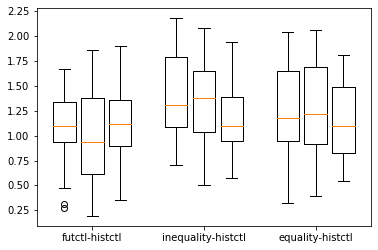

In [9]:
#make bar plots (3 bars ctl-hist, ineq-ctl and sust-ctl with variability shown through min/max or boxplot?)
data=[ds_TREFHT_ctl_1_mean.values-ds_TREFHT_hist_1_mean.values,ds_TREFHT_ineq_1_mean.values-ds_TREFHT_ctl_1_mean.values,ds_TREFHT_sust_1_mean.values-ds_TREFHT_ctl_1_mean.values]
data1=[ds_TREFHT_ctl_1_mean.values-ds_TREFHT_hist_1_mean.values,ds_TREFHT_ctl_2_mean.values-ds_TREFHT_hist_2_mean.values,ds_TREFHT_ctl_3_mean.values-ds_TREFHT_hist_3_mean.values]
data2=[ds_TREFHT_ineq_1_mean.values-ds_TREFHT_ctl_1_mean.values,ds_TREFHT_ineq_2_mean.values-ds_TREFHT_ctl_2_mean.values,ds_TREFHT_ineq_3_mean.values-ds_TREFHT_ctl_3_mean.values]
data3=[ds_TREFHT_sust_1_mean.values-ds_TREFHT_ctl_1_mean.values,ds_TREFHT_sust_2_mean.values-ds_TREFHT_ctl_2_mean.values,ds_TREFHT_sust_3_mean.values-ds_TREFHT_ctl_3_mean.values]
data4=[ds_TREFHT_ineq_1_mean.values-ds_TREFHT_hist_1_mean.values,ds_TREFHT_ineq_2_mean.values-ds_TREFHT_hist_2_mean.values,ds_TREFHT_ineq_3_mean.values-ds_TREFHT_hist_3_mean.values]
data5=[ds_TREFHT_sust_1_mean.values-ds_TREFHT_hist_1_mean.values,ds_TREFHT_sust_2_mean.values-ds_TREFHT_hist_2_mean.values,ds_TREFHT_sust_3_mean.values-ds_TREFHT_hist_3_mean.values]


fig1, ax = plt.subplots()


# first boxplot pair
bp = ax.boxplot(data1, positions = [1, 1.5,2], widths = 0.4)

# second boxplot pair
bp = ax.boxplot(data4, positions = [3, 3.5,4], widths = 0.4)

# thrid boxplot pair
bp = ax.boxplot(data5, positions = [5, 5.5,6], widths = 0.4)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['futctl-histctl', 'inequality-histctl', 'equality-histctl'])


Text(0, 0.5, 'GMT change to preindustrial')

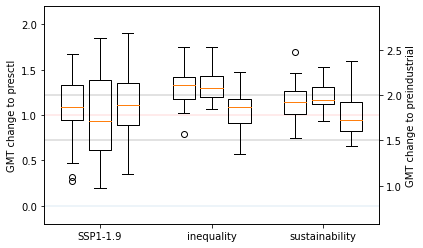

In [10]:
fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-0.2,2.2)
ax2.set_ylim(0.58,2.98)
ax.set_xlim(0.5,6.5)

data2=[ds_TREFHT_ineq_1_mean.values-ds_TREFHT_ctl_1_mean.values+1,ds_TREFHT_ineq_2_mean.values-ds_TREFHT_ctl_2_mean.values+1,ds_TREFHT_ineq_3_mean.values-ds_TREFHT_ctl_3_mean.values+1]
data3=[ds_TREFHT_sust_1_mean.values-ds_TREFHT_ctl_1_mean.values+1,ds_TREFHT_sust_2_mean.values-ds_TREFHT_ctl_2_mean.values+1,ds_TREFHT_sust_3_mean.values-ds_TREFHT_ctl_3_mean.values+1]

# first boxplot pair
bp = ax.boxplot(data1, positions = [1, 1.5,2], widths = 0.4)

# second boxplot pair
bp = ax.boxplot(data2, positions = [3, 3.5,4], widths = 0.4)

# thrid boxplot pair
bp = ax.boxplot(data3, positions = [5, 5.5,6], widths = 0.4)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['SSP1-1.9', 'inequality', 'sustainability'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
ax.hlines(y=1,xmin=0,xmax=10,alpha=0.1,color='r')
ax2.hlines(y=1.5,xmin=0,xmax=10,alpha=0.15,color='black')
ax2.hlines(y=2,xmin=0,xmax=10,alpha=0.15,color='black')

ax.set_ylabel('GMT change to presctl')
ax2.set_ylabel('GMT change to preindustrial')

In [11]:
print(np.median(data2[:])-1)

0.238372802734375


Text(0, 0.5, 'GMT change to futctl')

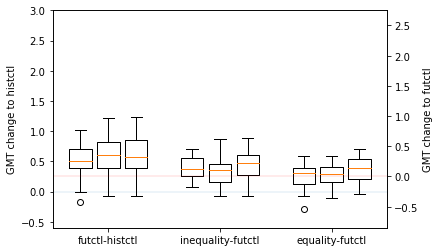

In [12]:
fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-0.6,3)
ax2.set_ylim(-0.85,2.75)
ax.set_xlim(0.5,6.5)

data1=[ds_TREFHT_mpiesm_ctl_1_mean.values-ds_TREFHT_mpiesm_hist_1_mean.values,ds_TREFHT_mpiesm_ctl_2_mean.values-ds_TREFHT_mpiesm_hist_2_mean.values,ds_TREFHT_mpiesm_ctl_3_mean.values-ds_TREFHT_mpiesm_hist_3_mean.values]
data2=[ds_TREFHT_mpiesm_ineq_1_mean.values-ds_TREFHT_mpiesm_ctl_1_mean.values+0.25,ds_TREFHT_mpiesm_ineq_2_mean.values-ds_TREFHT_mpiesm_ctl_2_mean.values+0.25,ds_TREFHT_mpiesm_ineq_3_mean.values-ds_TREFHT_mpiesm_ctl_3_mean.values+0.25]
data3=[ds_TREFHT_mpiesm_sust_1_mean.values-ds_TREFHT_mpiesm_ctl_1_mean.values+0.25,ds_TREFHT_mpiesm_sust_2_mean.values-ds_TREFHT_mpiesm_ctl_2_mean.values+0.25,ds_TREFHT_mpiesm_sust_3_mean.values-ds_TREFHT_mpiesm_ctl_3_mean.values+0.25]


# first boxplot pair
bp = ax.boxplot(data1, positions = [1, 1.5,2], widths = 0.4)

# second boxplot pair
bp = ax.boxplot(data2, positions = [3, 3.5,4], widths = 0.4)

# thrid boxplot pair
bp = ax.boxplot(data3, positions = [5, 5.5,6], widths = 0.4)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['futctl-histctl', 'inequality-futctl', 'equality-futctl'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('GMT change to histctl')
ax2.set_ylabel('GMT change to futctl')

Text(0, 0.5, 'GMT change to futctl')

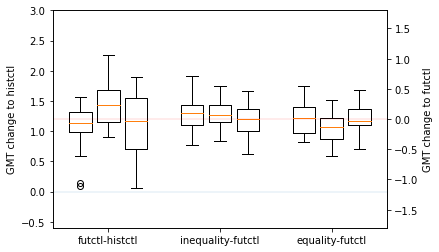

In [13]:
fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-0.6,3)
ax2.set_ylim(-1.8,1.8)
ax.set_xlim(0.5,6.5)

data1=[ds_TREFHT_ecearth_ctl_1_mean.values-ds_TREFHT_ecearth_hist_1_mean.values,ds_TREFHT_ecearth_ctl_2_mean.values-ds_TREFHT_ecearth_hist_2_mean.values,ds_TREFHT_ecearth_ctl_3_mean.values-ds_TREFHT_ecearth_hist_3_mean.values]
data2=[ds_TREFHT_ecearth_ineq_1_mean.values-ds_TREFHT_ecearth_ctl_1_mean.values+1.2,ds_TREFHT_ecearth_ineq_2_mean.values-ds_TREFHT_ecearth_ctl_2_mean.values+1.2,ds_TREFHT_ecearth_ineq_3_mean.values-ds_TREFHT_ecearth_ctl_3_mean.values+1.2]
data3=[ds_TREFHT_ecearth_sust_1_mean.values-ds_TREFHT_ecearth_ctl_1_mean.values+1.2,ds_TREFHT_ecearth_sust_2_mean.values-ds_TREFHT_ecearth_ctl_2_mean.values+1.2,ds_TREFHT_ecearth_sust_3_mean.values-ds_TREFHT_ecearth_ctl_3_mean.values+1.2]


# first boxplot pair
bp = ax.boxplot(data1, positions = [1, 1.5,2], widths = 0.4)

# second boxplot pair
bp = ax.boxplot(data2, positions = [3, 3.5,4], widths = 0.4)

# thrid boxplot pair
bp = ax.boxplot(data3, positions = [5, 5.5,6], widths = 0.4)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['futctl-histctl', 'inequality-futctl', 'equality-futctl'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('GMT change to histctl')
ax2.set_ylabel('GMT change to futctl')

Text(0, 0.5, 'GMT change to preindustrial (°C)')

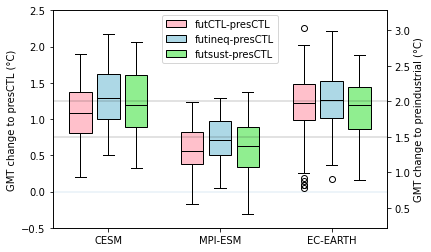

In [14]:
##make boxplot per esm and case use color coding for cases

fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-0.5,2.5)
ax2.set_ylim(0.22,3.28)
ax.set_xlim(0.5,6.5)


list_futctl_histctl=[ds_TREFHT_ctl_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_ctl_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_ctl_mean.values-ds_TREFHT_ecearth_hist_mean.values]
list_futineq_futctl=[ds_TREFHT_ineq_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_ineq_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_ineq_mean.values-ds_TREFHT_ecearth_hist_mean.values]
list_futsust_futctl=[ds_TREFHT_sust_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_sust_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_sust_mean.values-ds_TREFHT_ecearth_hist_mean.values]

data1=[list_futctl_histctl[0],list_futctl_histctl[0]+list_futineq_futctl[0],list_futctl_histctl[0]+list_futsust_futctl[0]]
data2=[list_futctl_histctl[1],list_futctl_histctl[1]+list_futineq_futctl[1],list_futctl_histctl[1]+list_futsust_futctl[1]]
data3=[list_futctl_histctl[2],list_futctl_histctl[2]+list_futineq_futctl[2],list_futctl_histctl[2]+list_futsust_futctl[2]]


def box_plot(data, edge_color, fill_color,pos0):
    bp = ax.boxplot(data, positions = [pos0,pos0+2,pos0+4], widths = 0.4,patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

# first boxplot pair
bp1=box_plot(list_futctl_histctl, edge_color='black', fill_color='pink',pos0=1)

# second boxplot pair
bp2=box_plot(list_futineq_futctl, edge_color='black', fill_color='lightblue',pos0=1.5)

# thrid boxplot pair
bp3=box_plot(list_futsust_futctl, edge_color='black', fill_color='lightgreen',pos0=2)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['CESM', 'MPI-ESM', 'EC-EARTH'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
#ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('GMT change to presCTL (°C)')
ax.legend([bp1["boxes"][0], bp2["boxes"][0],bp3["boxes"][0]], ['futCTL-presCTL', 'futineq-presCTL','futsust-presCTL'])

#ax2.set_ylabel('GMT change to futctl')
ax2.hlines(y=1.5,xmin=0,xmax=10,alpha=0.15,color='black')
ax2.hlines(y=2,xmin=0,xmax=10,alpha=0.15,color='black')

ax2.set_ylabel('GMT change to preindustrial (°C)')

In [15]:
print('cesm '+str(list_futctl_histctl[0].mean())+',mpiesm '+str(list_futctl_histctl[1].mean())+',ecearth '+str(list_futctl_histctl[2].mean()))

cesm 1.0823632,mpiesm 0.57041425,ecearth 1.2030978


In [16]:
print('cesm '+str(list_futineq_futctl[0].mean())+',mpiesm '+str(list_futineq_futctl[1].mean())+',ecearth '+str(list_futineq_futctl[2].mean()))

cesm 1.3125818,mpiesm 0.7155928,ecearth 1.254801


In [17]:
print('cesm '+str(list_futsust_futctl[0].mean())+',mpiesm '+str(list_futsust_futctl[1].mean())+',ecearth '+str(list_futsust_futctl[2].mean()))

cesm 1.2040429,mpiesm 0.6202335,ecearth 1.1540215


Text(0, 0.5, 'GMT change to preindustrial')

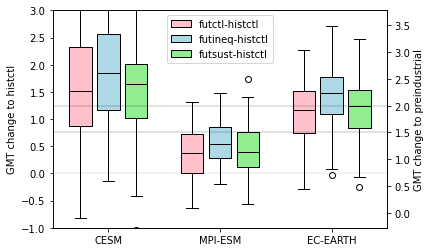

In [18]:
##make boxplot per esm and case use color coding for cases

fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-1,3)
ax2.set_ylim(-0.28,3.78)
ax.set_xlim(0.5,6.5)


list_futctl_histctl=[ds_TREFHT_land_ctl_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_ctl_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_ctl_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]
list_futineq_futctl=[ds_TREFHT_land_ineq_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_ineq_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_ineq_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]
list_futsust_futctl=[ds_TREFHT_land_sust_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_sust_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_sust_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]

data1=[list_futctl_histctl[0],list_futctl_histctl[0]+list_futineq_futctl[0],list_futctl_histctl[0]+list_futsust_futctl[0]]
data2=[list_futctl_histctl[1],list_futctl_histctl[1]+list_futineq_futctl[1],list_futctl_histctl[1]+list_futsust_futctl[1]]
data3=[list_futctl_histctl[2],list_futctl_histctl[2]+list_futineq_futctl[2],list_futctl_histctl[2]+list_futsust_futctl[2]]


def box_plot(data, edge_color, fill_color,pos0):
    bp = ax.boxplot(data, positions = [pos0,pos0+2,pos0+4], widths = 0.4,patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

# first boxplot pair
bp1=box_plot(list_futctl_histctl, edge_color='black', fill_color='pink',pos0=1)

# second boxplot pair
bp2=box_plot(list_futineq_futctl, edge_color='black', fill_color='lightblue',pos0=1.5)

# thrid boxplot pair
bp3=box_plot(list_futsust_futctl, edge_color='black', fill_color='lightgreen',pos0=2)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['CESM', 'MPI-ESM', 'EC-EARTH'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
#ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('GMT change to histctl')
ax.legend([bp1["boxes"][0], bp2["boxes"][0],bp3["boxes"][0]], ['futctl-histctl', 'futineq-histctl','futsust-histctl'])

#ax2.set_ylabel('GMT change to futland_ctl')
ax2.hlines(y=1.5,xmin=0,xmax=10,alpha=0.15,color='black')
ax2.hlines(y=2,xmin=0,xmax=10,alpha=0.15,color='black')

ax2.set_ylabel('GMT change to preindustrial')


In [19]:
print('cesm '+str(list_futctl_histctl[0].mean())+',mpiesm '+str(list_futctl_histctl[1].mean())+',ecearth '+str(list_futctl_histctl[2].mean()))

cesm 1.584035,mpiesm 0.36705932,ecearth 1.130245


In [20]:
print('cesm '+str(list_futineq_futctl[0].mean())+',mpiesm '+str(list_futineq_futctl[1].mean())+',ecearth '+str(list_futineq_futctl[2].mean()))

cesm 1.845182,mpiesm 0.561872,ecearth 1.4087412


In [21]:
print('cesm '+str(list_futsust_futctl[0].mean())+',mpiesm '+str(list_futsust_futctl[1].mean())+',ecearth '+str(list_futsust_futctl[2].mean()))

cesm 1.4800557,mpiesm 0.45736796,ecearth 1.1713209


In [22]:


ds_TREFHT_hist_1=open_da('wbgt','hist','cesm','cam','001')
ds_TREFHT_hist_2=open_da('wbgt','hist','cesm','cam','002')
ds_TREFHT_hist_3=open_da('wbgt','hist','cesm','cam','003')

ds_TREFHT_ctl_1=open_da('wbgt','futctl','cesm','cam','001')
ds_TREFHT_ctl_2=open_da('wbgt','futctl','cesm','cam','002')
ds_TREFHT_ctl_3=open_da('wbgt','futctl','cesm','cam','003')

ds_TREFHT_sust_1=open_da('wbgt','futsust','cesm','cam','001')
ds_TREFHT_sust_2=open_da('wbgt','futsust','cesm','cam','002')
ds_TREFHT_sust_3=open_da('wbgt','futsust','cesm','cam','003')

ds_TREFHT_ineq_1=open_da('wbgt','futineq','cesm','cam','001')
ds_TREFHT_ineq_2=open_da('wbgt','futineq','cesm','cam','002')
ds_TREFHT_ineq_3=open_da('wbgt','futineq','cesm','cam','003')


ds_TREFHT_mpiesm_hist_1=open_da('wbgt','hist','mpiesm','cam','001')
ds_TREFHT_mpiesm_hist_2=open_da('wbgt','hist','mpiesm','cam','002')
ds_TREFHT_mpiesm_hist_3=open_da('wbgt','hist','mpiesm','cam','003')

ds_TREFHT_mpiesm_ctl_1=open_da('wbgt','futctl','mpiesm','cam','001')
ds_TREFHT_mpiesm_ctl_2=open_da('wbgt','futctl','mpiesm','cam','002')
ds_TREFHT_mpiesm_ctl_3=open_da('wbgt','futctl','mpiesm','cam','003')

ds_TREFHT_mpiesm_sust_1=open_da('wbgt','futsust','mpiesm','cam','001')
ds_TREFHT_mpiesm_sust_2=open_da('wbgt','futsust','mpiesm','cam','002')
ds_TREFHT_mpiesm_sust_3=open_da('wbgt','futsust','mpiesm','cam','003')

ds_TREFHT_mpiesm_ineq_1=open_da('wbgt','futineq','mpiesm','cam','001')
ds_TREFHT_mpiesm_ineq_2=open_da('wbgt','futineq','mpiesm','cam','002')
ds_TREFHT_mpiesm_ineq_3=open_da('wbgt','futineq','mpiesm','cam','003')

ds_TREFHT_ecearth_hist_1=open_da('wbgt','hist','ecearth','cam','001')
ds_TREFHT_ecearth_hist_2=open_da('wbgt','hist','ecearth','cam','002')
ds_TREFHT_ecearth_hist_3=open_da('wbgt','hist','ecearth','cam','003')

ds_TREFHT_ecearth_ctl_1=open_da('wbgt','futctl','ecearth','cam','001')
ds_TREFHT_ecearth_ctl_2=open_da('wbgt','futctl','ecearth','cam','002')
ds_TREFHT_ecearth_ctl_3=open_da('wbgt','futctl','ecearth','cam','003')

ds_TREFHT_ecearth_sust_1=open_da('wbgt','futsust','ecearth','cam','001')
ds_TREFHT_ecearth_sust_2=open_da('wbgt','futsust','ecearth','cam','002')
ds_TREFHT_ecearth_sust_3=open_da('wbgt','futsust','ecearth','cam','003')

ds_TREFHT_ecearth_ineq_1=open_da('wbgt','futineq','ecearth','cam','001')
ds_TREFHT_ecearth_ineq_2=open_da('wbgt','futineq','ecearth','cam','002')
ds_TREFHT_ecearth_ineq_3=open_da('wbgt','futineq','ecearth','cam','003')


In [23]:
#compute spatial means (global and/or regional)

ds_TREFHT_ecearth_hist_1_mean=ds_TREFHT_ecearth_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:]
ds_TREFHT_ecearth_hist_2_mean=ds_TREFHT_ecearth_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:]
ds_TREFHT_ecearth_hist_3_mean=ds_TREFHT_ecearth_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:]

ds_TREFHT_ecearth_hist_mean=xr.concat([ds_TREFHT_ecearth_hist_1_mean,ds_TREFHT_ecearth_hist_2_mean,ds_TREFHT_ecearth_hist_3_mean],'time')

ds_TREFHT_ecearth_ctl_1_mean=ds_TREFHT_ecearth_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ctl_2_mean=ds_TREFHT_ecearth_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ctl_3_mean=ds_TREFHT_ecearth_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ctl_mean=xr.concat([ds_TREFHT_ecearth_ctl_1_mean,ds_TREFHT_ecearth_ctl_2_mean,ds_TREFHT_ecearth_ctl_3_mean],'time')

ds_TREFHT_ecearth_sust_1_mean=ds_TREFHT_ecearth_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_sust_2_mean=ds_TREFHT_ecearth_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_sust_3_mean=ds_TREFHT_ecearth_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_sust_mean=xr.concat([ds_TREFHT_ecearth_sust_1_mean,ds_TREFHT_ecearth_sust_2_mean,ds_TREFHT_ecearth_sust_3_mean],'time')

ds_TREFHT_ecearth_ineq_1_mean=ds_TREFHT_ecearth_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ineq_2_mean=ds_TREFHT_ecearth_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ineq_3_mean=ds_TREFHT_ecearth_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_ineq_mean=xr.concat([ds_TREFHT_ecearth_ineq_1_mean,ds_TREFHT_ecearth_ineq_2_mean,ds_TREFHT_ecearth_ineq_3_mean],'time')


ds_TREFHT_mpiesm_hist_1_mean=ds_TREFHT_mpiesm_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_hist_2_mean=ds_TREFHT_mpiesm_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_hist_3_mean=ds_TREFHT_mpiesm_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]

ds_TREFHT_mpiesm_hist_mean=xr.concat([ds_TREFHT_mpiesm_hist_1_mean,ds_TREFHT_mpiesm_hist_2_mean,ds_TREFHT_mpiesm_hist_3_mean],'time')

ds_TREFHT_mpiesm_ctl_1_mean=ds_TREFHT_mpiesm_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ctl_2_mean=ds_TREFHT_mpiesm_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ctl_3_mean=ds_TREFHT_mpiesm_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ctl_mean=xr.concat([ds_TREFHT_mpiesm_ctl_1_mean,ds_TREFHT_mpiesm_ctl_2_mean,ds_TREFHT_mpiesm_ctl_3_mean],'time')

ds_TREFHT_mpiesm_sust_1_mean=ds_TREFHT_mpiesm_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_sust_2_mean=ds_TREFHT_mpiesm_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_sust_3_mean=ds_TREFHT_mpiesm_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_sust_mean=xr.concat([ds_TREFHT_mpiesm_sust_1_mean,ds_TREFHT_mpiesm_sust_2_mean,ds_TREFHT_mpiesm_sust_3_mean],'time')

ds_TREFHT_mpiesm_ineq_1_mean=ds_TREFHT_mpiesm_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ineq_2_mean=ds_TREFHT_mpiesm_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ineq_3_mean=ds_TREFHT_mpiesm_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_ineq_mean=xr.concat([ds_TREFHT_mpiesm_ineq_1_mean,ds_TREFHT_mpiesm_ineq_2_mean,ds_TREFHT_mpiesm_ineq_3_mean],'time')


ds_TREFHT_hist_1_mean=ds_TREFHT_hist_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_2_mean=ds_TREFHT_hist_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_3_mean=ds_TREFHT_hist_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_hist_mean=xr.concat([ds_TREFHT_hist_1_mean,ds_TREFHT_hist_2_mean,ds_TREFHT_hist_3_mean],'time')

ds_TREFHT_ctl_1_mean=ds_TREFHT_ctl_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ctl_2_mean=ds_TREFHT_ctl_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ctl_3_mean=ds_TREFHT_ctl_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ctl_mean=xr.concat([ds_TREFHT_ctl_1_mean,ds_TREFHT_ctl_2_mean,ds_TREFHT_ctl_3_mean],'time')

ds_TREFHT_sust_1_mean=ds_TREFHT_sust_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_sust_2_mean=ds_TREFHT_sust_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_sust_3_mean=ds_TREFHT_sust_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_sust_mean=xr.concat([ds_TREFHT_sust_1_mean,ds_TREFHT_sust_2_mean,ds_TREFHT_sust_3_mean],'time')

ds_TREFHT_ineq_1_mean=ds_TREFHT_ineq_1.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ineq_2_mean=ds_TREFHT_ineq_2.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ineq_3_mean=ds_TREFHT_ineq_3.mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ineq_mean=xr.concat([ds_TREFHT_ineq_1_mean,ds_TREFHT_ineq_2_mean,ds_TREFHT_ineq_3_mean],'time')


Text(0, 0.5, 'GMT change to preindustrial')

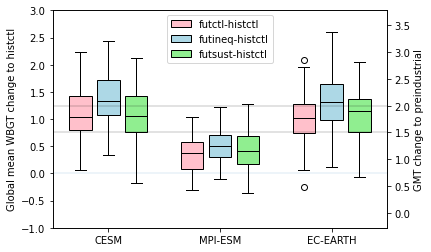

In [24]:
##make boxplot per esm and case use color coding for cases

fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-1,3)
ax2.set_ylim(-0.28,3.78)
ax.set_xlim(0.5,6.5)


list_futctl_histctl=[ds_TREFHT_ctl_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_ctl_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_ctl_mean.values-ds_TREFHT_ecearth_hist_mean.values]
list_futineq_futctl=[ds_TREFHT_ineq_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_ineq_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_ineq_mean.values-ds_TREFHT_ecearth_hist_mean.values]
list_futsust_futctl=[ds_TREFHT_sust_mean.values-ds_TREFHT_hist_mean.values,ds_TREFHT_mpiesm_sust_mean.values-ds_TREFHT_mpiesm_hist_mean.values,ds_TREFHT_ecearth_sust_mean.values-ds_TREFHT_ecearth_hist_mean.values]

data1=[list_futctl_histctl[0],list_futctl_histctl[0]+list_futineq_futctl[0],list_futctl_histctl[0]+list_futsust_futctl[0]]
data2=[list_futctl_histctl[1],list_futctl_histctl[1]+list_futineq_futctl[1],list_futctl_histctl[1]+list_futsust_futctl[1]]
data3=[list_futctl_histctl[2],list_futctl_histctl[2]+list_futineq_futctl[2],list_futctl_histctl[2]+list_futsust_futctl[2]]


def box_plot(data, edge_color, fill_color,pos0):
    bp = ax.boxplot(data, positions = [pos0,pos0+2,pos0+4], widths = 0.4,patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

# first boxplot pair
bp1=box_plot(list_futctl_histctl, edge_color='black', fill_color='pink',pos0=1)

# second boxplot pair
bp2=box_plot(list_futineq_futctl, edge_color='black', fill_color='lightblue',pos0=1.5)

# thrid boxplot pair
bp3=box_plot(list_futsust_futctl, edge_color='black', fill_color='lightgreen',pos0=2)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['CESM', 'MPI-ESM', 'EC-EARTH'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
#ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('Global mean WBGT change to histctl')
ax.legend([bp1["boxes"][0], bp2["boxes"][0],bp3["boxes"][0]], ['futctl-histctl', 'futineq-histctl','futsust-histctl'])

#ax2.set_ylabel('GMT change to futctl')
ax2.hlines(y=1.5,xmin=0,xmax=10,alpha=0.15,color='black')
ax2.hlines(y=2,xmin=0,xmax=10,alpha=0.15,color='black')

ax2.set_ylabel('GMT change to preindustrial')

In [25]:
print('cesm '+str(list_futctl_histctl[0].mean())+',mpiesm '+str(list_futctl_histctl[1].mean())+',ecearth '+str(list_futctl_histctl[2].mean()))

cesm 1.1216241457159608,mpiesm 0.3604595238730503,ecearth 0.9842903163544912


In [26]:
print('cesm '+str(list_futineq_futctl[0].mean())+',mpiesm '+str(list_futineq_futctl[1].mean())+',ecearth '+str(list_futineq_futctl[2].mean()))

cesm 1.4125281374896215,mpiesm 0.5125076952808261,ecearth 1.2844391481957524


In [27]:
print('cesm '+str(list_futsust_futctl[0].mean())+',mpiesm '+str(list_futsust_futctl[1].mean())+',ecearth '+str(list_futsust_futctl[2].mean()))

cesm 1.0733757145189662,mpiesm 0.4380604513860293,ecearth 1.0494218535279862


In [28]:


ds_TREFHT_hist_1=open_da('wbgt_monmax','hist',esm='cesm',model='clm2',ens='001',stream='h1')
ds_TREFHT_hist_2=open_da('wbgt_monmax','hist','cesm','clm2','002',stream='h1')
ds_TREFHT_hist_3=open_da('wbgt_monmax','hist','cesm','clm2','003',stream='h1')

ds_TREFHT_ctl_1=open_da('wbgt_monmax','futctl','cesm','clm2','001',stream='h1')
ds_TREFHT_ctl_2=open_da('wbgt_monmax','futctl','cesm','clm2','002',stream='h1')
ds_TREFHT_ctl_3=open_da('wbgt_monmax','futctl','cesm','clm2','003',stream='h1')

ds_TREFHT_sust_1=open_da('wbgt_monmax','futsust','cesm','clm2','001',stream='h1')
ds_TREFHT_sust_2=open_da('wbgt_monmax','futsust','cesm','clm2','002',stream='h1')
ds_TREFHT_sust_3=open_da('wbgt_monmax','futsust','cesm','clm2','003',stream='h1')

ds_TREFHT_ineq_1=open_da('wbgt_monmax','futineq','cesm','clm2','001',stream='h1')
ds_TREFHT_ineq_2=open_da('wbgt_monmax','futineq','cesm','clm2','002',stream='h1')
ds_TREFHT_ineq_3=open_da('wbgt_monmax','futineq','cesm','clm2','003',stream='h1')


ds_TREFHT_mpiesm_hist_1=open_da('wbgt_monmax','hist','mpiesm','clm2','001',stream='h1')
ds_TREFHT_mpiesm_hist_2=open_da('wbgt_monmax','hist','mpiesm','clm2','002',stream='h1')
ds_TREFHT_mpiesm_hist_3=open_da('wbgt_monmax','hist','mpiesm','clm2','003',stream='h1')

ds_TREFHT_mpiesm_ctl_1=open_da('wbgt_monmax','futctl','mpiesm','clm2','001',stream='h1')
ds_TREFHT_mpiesm_ctl_2=open_da('wbgt_monmax','futctl','mpiesm','clm2','002',stream='h1')
ds_TREFHT_mpiesm_ctl_3=open_da('wbgt_monmax','futctl','mpiesm','clm2','003',stream='h1')

ds_TREFHT_mpiesm_sust_1=open_da('wbgt_monmax','futsust','mpiesm','clm2','001',stream='h1')
ds_TREFHT_mpiesm_sust_2=open_da('wbgt_monmax','futsust','mpiesm','clm2','002',stream='h1')
ds_TREFHT_mpiesm_sust_3=open_da('wbgt_monmax','futsust','mpiesm','clm2','003',stream='h1')

ds_TREFHT_mpiesm_ineq_1=open_da('wbgt_monmax','futineq','mpiesm','clm2','001',stream='h1')
ds_TREFHT_mpiesm_ineq_2=open_da('wbgt_monmax','futineq','mpiesm','clm2','002',stream='h1')
ds_TREFHT_mpiesm_ineq_3=open_da('wbgt_monmax','futineq','mpiesm','clm2','003',stream='h1')

ds_TREFHT_ecearth_hist_1=open_da('wbgt_monmax','hist','ecearth','clm2','001',stream='h1')
ds_TREFHT_ecearth_hist_2=open_da('wbgt_monmax','hist','ecearth','clm2','002',stream='h1')
ds_TREFHT_ecearth_hist_3=open_da('wbgt_monmax','hist','ecearth','clm2','003',stream='h1')

ds_TREFHT_ecearth_ctl_1=open_da('wbgt_monmax','futctl','ecearth','clm2','001',stream='h1')
ds_TREFHT_ecearth_ctl_2=open_da('wbgt_monmax','futctl','ecearth','clm2','002',stream='h1')
ds_TREFHT_ecearth_ctl_3=open_da('wbgt_monmax','futctl','ecearth','clm2','003',stream='h1')

ds_TREFHT_ecearth_sust_1=open_da('wbgt_monmax','futsust','ecearth','clm2','001',stream='h1')
ds_TREFHT_ecearth_sust_2=open_da('wbgt_monmax','futsust','ecearth','clm2','002',stream='h1')
ds_TREFHT_ecearth_sust_3=open_da('wbgt_monmax','futsust','ecearth','clm2','003',stream='h1')

ds_TREFHT_ecearth_ineq_1=open_da('wbgt_monmax','futineq','ecearth','clm2','001',stream='h1')
ds_TREFHT_ecearth_ineq_2=open_da('wbgt_monmax','futineq','ecearth','clm2','002',stream='h1')
ds_TREFHT_ecearth_ineq_3=open_da('wbgt_monmax','futineq','ecearth','clm2','003',stream='h1')


In [29]:
#compute spatial means (global and/or regional)
mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
mask_cesm=xr.open_dataset(mask_dir+'landmask_ecearth.nc')
da_mask=mask_cesm['landmask']
da_mask=da_mask.mean('time')
#    da_mask['lat']=da_delta.lat
#    da_mask['lon']=da_delta.lon
ds_TREFHT_ecearth_land_hist_1_mean=ds_TREFHT_ecearth_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:]
ds_TREFHT_ecearth_land_hist_2_mean=ds_TREFHT_ecearth_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:]
ds_TREFHT_ecearth_land_hist_3_mean=ds_TREFHT_ecearth_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:]
ds_TREFHT_ecearth_land_hist_mean=xr.concat([ds_TREFHT_ecearth_land_hist_1_mean,ds_TREFHT_ecearth_land_hist_2_mean,ds_TREFHT_ecearth_land_hist_3_mean],'time')


ds_TREFHT_ecearth_land_ctl_1_mean=ds_TREFHT_ecearth_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_2_mean=ds_TREFHT_ecearth_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_3_mean=ds_TREFHT_ecearth_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ctl_mean=xr.concat([ds_TREFHT_ecearth_land_ctl_1_mean,ds_TREFHT_ecearth_land_ctl_2_mean,ds_TREFHT_ecearth_land_ctl_3_mean],'time')


ds_TREFHT_ecearth_land_sust_1_mean=ds_TREFHT_ecearth_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_2_mean=ds_TREFHT_ecearth_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_3_mean=ds_TREFHT_ecearth_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_sust_mean=xr.concat([ds_TREFHT_ecearth_land_sust_1_mean,ds_TREFHT_ecearth_land_sust_2_mean,ds_TREFHT_ecearth_land_sust_3_mean],'time')


ds_TREFHT_ecearth_land_ineq_1_mean=ds_TREFHT_ecearth_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_2_mean=ds_TREFHT_ecearth_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_3_mean=ds_TREFHT_ecearth_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_ecearth_land_ineq_mean=xr.concat([ds_TREFHT_ecearth_land_ineq_1_mean,ds_TREFHT_ecearth_land_ineq_2_mean,ds_TREFHT_ecearth_land_ineq_3_mean],'time')

mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
mask_cesm=xr.open_dataset(mask_dir+'landmask_mpiesm.nc')
da_mask=mask_cesm['landmask']
da_mask['lat']=ds_TREFHT_mpiesm_hist_1.lat
da_mask['lon']=ds_TREFHT_mpiesm_hist_1.lon

ds_TREFHT_mpiesm_land_hist_1_mean=ds_TREFHT_mpiesm_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_2_mean=ds_TREFHT_mpiesm_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_3_mean=ds_TREFHT_mpiesm_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_hist_mean=xr.concat([ds_TREFHT_mpiesm_land_hist_1_mean,ds_TREFHT_mpiesm_land_hist_2_mean,ds_TREFHT_mpiesm_land_hist_3_mean],'time')


ds_TREFHT_mpiesm_land_ctl_1_mean=ds_TREFHT_mpiesm_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_2_mean=ds_TREFHT_mpiesm_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_3_mean=ds_TREFHT_mpiesm_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ctl_mean=xr.concat([ds_TREFHT_mpiesm_land_ctl_1_mean,ds_TREFHT_mpiesm_land_ctl_2_mean,ds_TREFHT_mpiesm_land_ctl_3_mean],'time')


ds_TREFHT_mpiesm_land_sust_1_mean=ds_TREFHT_mpiesm_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_2_mean=ds_TREFHT_mpiesm_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_3_mean=ds_TREFHT_mpiesm_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_sust_mean=xr.concat([ds_TREFHT_mpiesm_land_sust_1_mean,ds_TREFHT_mpiesm_land_sust_2_mean,ds_TREFHT_mpiesm_land_sust_3_mean],'time')


ds_TREFHT_mpiesm_land_ineq_1_mean=ds_TREFHT_mpiesm_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_2_mean=ds_TREFHT_mpiesm_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_3_mean=ds_TREFHT_mpiesm_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_mpiesm_land_ineq_mean=xr.concat([ds_TREFHT_mpiesm_land_ineq_1_mean,ds_TREFHT_mpiesm_land_ineq_2_mean,ds_TREFHT_mpiesm_land_ineq_3_mean],'time')

mask_dir='/dodrio/scratch/projects/2022_200/project_output/bclimate/sdeherto/wam2layer/scripts/'
mask_cesm=xr.open_dataset(mask_dir+'landmask_cesm.nc')
da_mask=mask_cesm['landmask']

ds_TREFHT_land_hist_1_mean=ds_TREFHT_hist_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_2_mean=ds_TREFHT_hist_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_3_mean=ds_TREFHT_hist_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_hist_mean=xr.concat([ds_TREFHT_land_hist_1_mean,ds_TREFHT_land_hist_2_mean,ds_TREFHT_land_hist_3_mean],'time')


ds_TREFHT_land_ctl_1_mean=ds_TREFHT_ctl_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_2_mean=ds_TREFHT_ctl_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_3_mean=ds_TREFHT_ctl_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ctl_mean=xr.concat([ds_TREFHT_land_ctl_1_mean,ds_TREFHT_land_ctl_2_mean,ds_TREFHT_land_ctl_3_mean],'time')


ds_TREFHT_land_sust_1_mean=ds_TREFHT_sust_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_2_mean=ds_TREFHT_sust_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_3_mean=ds_TREFHT_sust_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_sust_mean=xr.concat([ds_TREFHT_land_sust_1_mean,ds_TREFHT_land_sust_2_mean,ds_TREFHT_land_sust_3_mean],'time')


ds_TREFHT_land_ineq_1_mean=ds_TREFHT_ineq_1.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_2_mean=ds_TREFHT_ineq_2.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_3_mean=ds_TREFHT_ineq_3.where(da_mask).mean(['lat','lon']).resample(time='AS').mean('time')[-31:-1]
ds_TREFHT_land_ineq_mean=xr.concat([ds_TREFHT_land_ineq_1_mean,ds_TREFHT_land_ineq_2_mean,ds_TREFHT_land_ineq_3_mean],'time')



Text(0, 0.5, 'WBGTmonmax change to preindustrial')

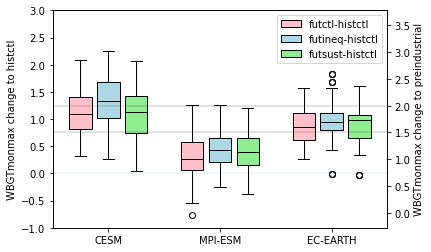

In [30]:
##make boxplot per esm and case use color coding for cases

fig1, ax = plt.subplots()
ax2 = ax.twinx()
ax.set_ylim(-1,3)
ax2.set_ylim(-0.28,3.78)
ax.set_xlim(0.5,6.5)


list_futctl_histctl=[ds_TREFHT_land_ctl_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_ctl_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_ctl_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]
list_futineq_futctl=[ds_TREFHT_land_ineq_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_ineq_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_ineq_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]
list_futsust_futctl=[ds_TREFHT_land_sust_mean.values-ds_TREFHT_land_hist_mean.values,ds_TREFHT_mpiesm_land_sust_mean.values-ds_TREFHT_mpiesm_land_hist_mean.values,ds_TREFHT_ecearth_land_sust_mean.values-ds_TREFHT_ecearth_land_hist_mean.values]

data1=[list_futctl_histctl[0],list_futctl_histctl[0]+list_futineq_futctl[0],list_futctl_histctl[0]+list_futsust_futctl[0]]
data2=[list_futctl_histctl[1],list_futctl_histctl[1]+list_futineq_futctl[1],list_futctl_histctl[1]+list_futsust_futctl[1]]
data3=[list_futctl_histctl[2],list_futctl_histctl[2]+list_futineq_futctl[2],list_futctl_histctl[2]+list_futsust_futctl[2]]


def box_plot(data, edge_color, fill_color,pos0):
    bp = ax.boxplot(data, positions = [pos0,pos0+2,pos0+4], widths = 0.4,patch_artist=True)
    
    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)       
        
    return bp

# first boxplot pair
bp1=box_plot(list_futctl_histctl, edge_color='black', fill_color='pink',pos0=1)

# second boxplot pair
bp2=box_plot(list_futineq_futctl, edge_color='black', fill_color='lightblue',pos0=1.5)

# thrid boxplot pair
bp3=box_plot(list_futsust_futctl, edge_color='black', fill_color='lightgreen',pos0=2)

ax.set_xticks([1.5, 3.5, 5.5])

ax.set_xticklabels(['CESM', 'MPI-ESM', 'EC-EARTH'])
ax.hlines(y=0,xmin=0,xmax=10,alpha=0.1)
#ax2.hlines(y=0,xmin=0,xmax=10,alpha=0.1,color='r')
ax.set_ylabel('WBGTmonmax change to histctl')
ax.legend([bp1["boxes"][0], bp2["boxes"][0],bp3["boxes"][0]], ['futctl-histctl', 'futineq-histctl','futsust-histctl'])

#ax2.set_ylabel('GMT change to futland_ctl')
ax2.hlines(y=1.5,xmin=0,xmax=10,alpha=0.15,color='black')
ax2.hlines(y=2,xmin=0,xmax=10,alpha=0.15,color='black')

ax2.set_ylabel('WBGTmonmax change to preindustrial')


In [31]:
print('cesm '+str(list_futctl_histctl[0].mean())+',mpiesm '+str(list_futctl_histctl[1].mean())+',ecearth '+str(list_futctl_histctl[2].mean()))

cesm 1.1099837238692039,mpiesm 0.3146596703072349,ecearth 0.8702498750516061


In [32]:
print('cesm '+str(list_futineq_futctl[0].mean())+',mpiesm '+str(list_futineq_futctl[1].mean())+',ecearth '+str(list_futineq_futctl[2].mean()))

cesm 1.3272003672912283,mpiesm 0.438719768617716,ecearth 0.9700679124038761


In [33]:
print('cesm '+str(list_futsust_futctl[0].mean())+',mpiesm '+str(list_futsust_futctl[1].mean())+',ecearth '+str(list_futsust_futctl[2].mean()))

cesm 1.1224539807531617,mpiesm 0.3869800439882214,ecearth 0.9081704654235939
